<a href="https://colab.research.google.com/github/BrettonSteiner/cse380-notebooks/blob/master/11_3_About_The_Petersen_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The Petersen Graph
## Class Directed Learning
### Due: Tuesday, 16 March 2021, 11:59 pm

## TODO Explore and Wonder

The Petersen graph is described as the complement of the line graph of $K_5$.

Draw each step of this construction using any graph-drawing tools in your toolbox.

Teach one another how to use the tools you each have.

In [16]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)

In [17]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set(tuple(sorted(link)) for link in links))

  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return (node.value, node.links)

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
    if not node_value in self.get_nodes():
      self.nodes.append(GraphNode(node_value, links))

  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)

In [18]:
# https://graphviz.org/
# https://pypi.org/project/pygraphviz/
import graphviz

def display_links(links, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges(links)
  graphic.engine = engine
  return graphic

def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic

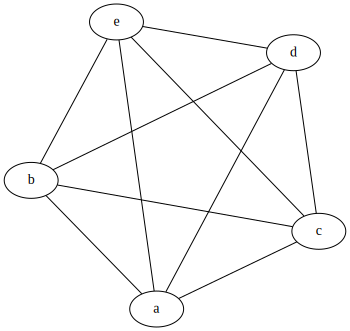

In [21]:
nodes = ['a', 'b', 'c', 'd', 'e']
links = [
  ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'),
  ('b', 'e'), ('c', 'd'), ('c', 'e'), ('d', 'e')
]

k5 = Graph(nodes, links)
display_graph(k5, 'sfdp')

['de', 'bd', 'ab', 'be', 'ad', 'cd', 'ae', 'ce', 'ac', 'bc']
de ee
de e['a', 'b', 'c', 'd']
bd dd
bd d['e', 'a', 'b', 'c']
ab bb
ab b['c', 'd', 'e', 'a']
be ee
be e['a', 'b', 'c', 'd']
ad dd
ad d['e', 'a', 'b', 'c']
cd dd
cd d['e', 'a', 'b', 'c']
ae ee
ae e['a', 'b', 'c', 'd']
ce ee
ce e['a', 'b', 'c', 'd']
ac cc
ac c['d', 'e', 'a', 'b']
bc cc
bc c['d', 'e', 'a', 'b']
['de', 'bd', 'ab', 'be', 'ad', 'cd', 'ae', 'ce', 'ac', 'bc', 'dd', "d['e', 'a', 'b', 'c']", 'ee', "e['a', 'b', 'c', 'd']", 'bb', "b['c', 'd', 'e', 'a']", 'aa', "a['b', 'c', 'd', 'e']", 'cc', "c['d', 'e', 'a', 'b']"]
[('b', 'd', 'e', 'e'), ('c', 'd', 'e', 'e'), ('a', 'a', 'e', 'e'), ('b', 'b', 'b', 'e'), (' ', ' ', ' ', "'", "'", "'", "'", "'", "'", "'", "'", ',', ',', ',', '[', ']', 'a', 'b', 'c', 'c', 'd', 'e', 'e'), ('b', 'b', 'b', 'b'), ('b', 'b', 'd', 'd'), ('a', 'b', 'b', 'd'), (' ', ' ', ' ', "'", "'", "'", "'", "'", "'", "'", "'", ',', ',', ',', '[', ']', 'a', 'b', 'c', 'd', 'd', 'd', 'e'), ('a', 'a', 'b', 'b'), ('

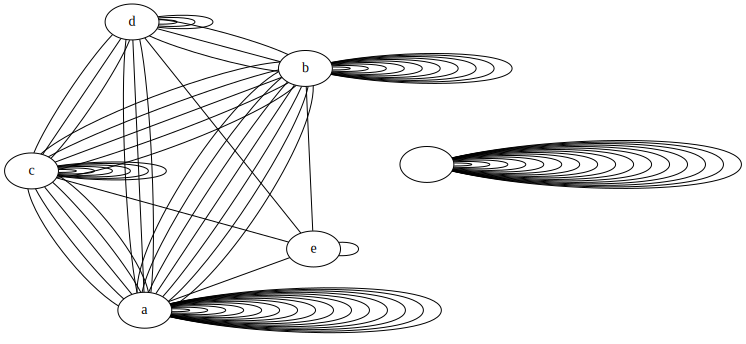

In [32]:
# Step 1: Add verticies constructed from the edges of K5
verticies = [str(link[0]) + str(link[1]) for link in k5.get_links()]

line_graph = Graph(verticies)
# Step 2: Add edges
for vertex in verticies:
  # print(vertex[0], vertex[1])
  adjacent_nodes = k5.get_adjacent_nodes(vertex[0])
  for node in adjacent_nodes:
    line_graph.add_link(str(vertex[0]) + str(vertex[1]), str(vertex[0]) + str(node))
  adjacent_nodes = k5.get_adjacent_nodes(vertex[1])
  for node in adjacent_nodes:
    line_graph.add_link(str(vertex[0]) + str(vertex[1]), str(vertex[1]) + str(node))
    print(str(vertex[0]) + str(vertex[1]), str(vertex[1]) + str(node))

print(line_graph.get_nodes())
print(line_graph.get_links())

display_graph(line_graph, 'sfdp')

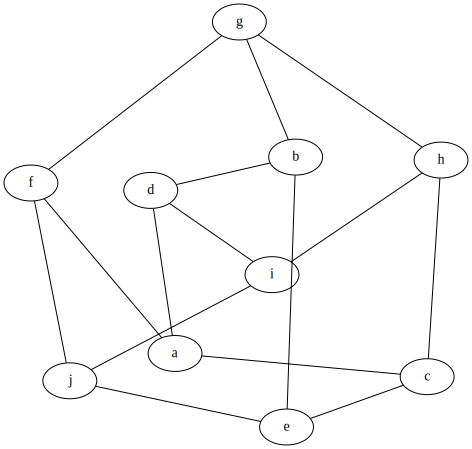

In [20]:
peterson = ['af', 'ac', 'ad', 'bg', 'bd', 'be', 'ch', 'ce', 'di', 'ej', 'fg', 'fj', 'gh', 'hi', 'ij']
display_links(peterson, 'sfdp')

I worked with Paul Semadeni and Daniel Strickland.